In [1]:
import dlib
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt

# create list for landmarks
ALL = list(range(0, 68))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
NOSE = list(range(27, 36))
MOUTH_OUTLINE = list(range(48, 61))
MOUTH_INNER = list(range(61, 68))
JAWLINE = list(range(0, 17))

# create face detector, predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [2]:
# read image
image_o = cv2.imread("temp2.jpg", cv2.IMREAD_COLOR)

In [3]:
# resize the video
#W = 640
#H = 480
# = cv2.resize(image_o, dsize=(W, H), interpolation=cv2.INTER_AREA
image = image_o

In [4]:
# gray scale conversion
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
# Get only 1 face (up-sampling=1)
face = detector(img_gray, 1)[0]

In [6]:
# face wrapped with rectangle
cv2.rectangle(img_gray, (face.left(), face.top()), (face.right(), face.bottom()),
              (0, 0, 255), 3)

array([[172, 172, 172, ..., 130, 148, 158],
       [172, 172, 172, ..., 130, 148, 158],
       [172, 172, 172, ..., 131, 148, 159],
       ...,
       [ 14,  17,  20, ...,  10,  10,  10],
       [ 15,  21,  27, ...,  10,  10,  10],
       [ 10,  12,  13, ...,  10,  10,   9]], dtype=uint8)

In [7]:
# make prediction and transform to numpy array
landmarks = predictor(img_gray, face)

In [8]:
#create list to contain landmarks
landmark_list = []

# append (x, y) in landmark_list
for p in landmarks.parts():
    landmark_list.append([p.x, p.y])
    cv2.circle(img_gray, (p.x, p.y), 2, (0, 255, 0), -1)

In [9]:
with open("landmarks.json", "w") as json_file :
    key_val = [ALL, landmark_list]
    landmark_dict = dict(zip(*key_val))
    print(landmark_dict)
    json_file.write(json.dumps(landmark_dict))
    json_file.write('\n')

{0: [288, 413], 1: [287, 470], 2: [291, 525], 3: [301, 580], 4: [324, 632], 5: [358, 680], 6: [398, 723], 7: [443, 755], 8: [493, 764], 9: [537, 750], 10: [572, 711], 11: [605, 668], 12: [632, 620], 13: [649, 571], 14: [658, 523], 15: [665, 475], 16: [668, 425], 17: [349, 391], 18: [378, 371], 19: [416, 368], 20: [454, 372], 21: [490, 387], 22: [553, 389], 23: [583, 379], 24: [615, 375], 25: [645, 380], 26: [662, 403], 27: [520, 430], 28: [521, 474], 29: [522, 517], 30: [523, 561], 31: [471, 558], 32: [493, 571], 33: [517, 583], 34: [540, 573], 35: [558, 561], 36: [393, 421], 37: [417, 412], 38: [443, 412], 39: [463, 428], 40: [440, 432], 41: [415, 431], 42: [562, 429], 43: [584, 416], 44: [608, 416], 45: [624, 427], 46: [608, 436], 47: [585, 434], 48: [409, 587], 49: [445, 588], 50: [484, 594], 51: [510, 600], 52: [535, 596], 53: [559, 593], 54: [580, 593], 55: [556, 637], 56: [530, 661], 57: [503, 665], 58: [474, 660], 59: [438, 635], 60: [419, 590], 61: [482, 605], 62: [509, 611], 6

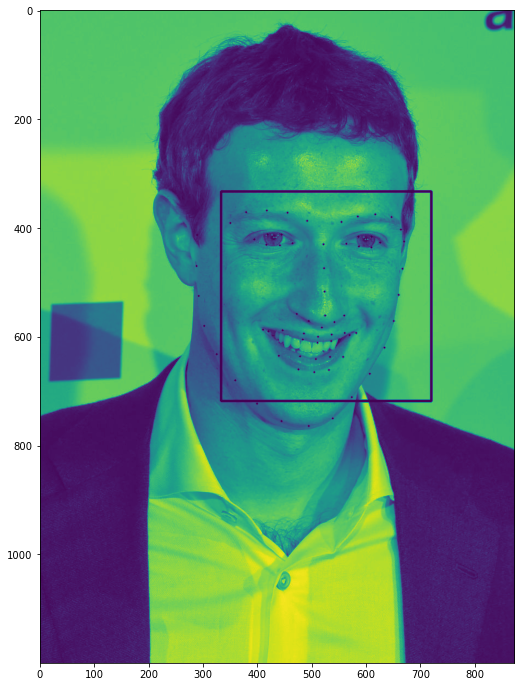

In [10]:
plt.figure(figsize=(16, 12))
plt.imshow(img_gray)
plt.show()
# This image is a gray scale one.
# plt(pyplot) is not made for image processing, so the color can be strange.

In [11]:
cv2.imshow('result', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()